## Exploratory Data Analysis

This section is dedicated to performing exploratory data analysis to obtain a better understanding of the data. 

In [254]:
train_data.columns

Index(['index', 'Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',


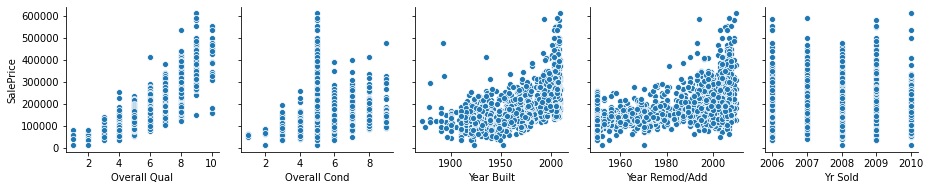

In [255]:
sns.pairplot(train_data, x_vars = ['Overall Qual','Overall Cond','Year Built', 
                         'Year Remod/Add','Yr Sold'],
            y_vars = ['SalePrice']);
possible_predictors=['Overall Qual']

From this pairplot, only Overrall quality might be a good predictor. 

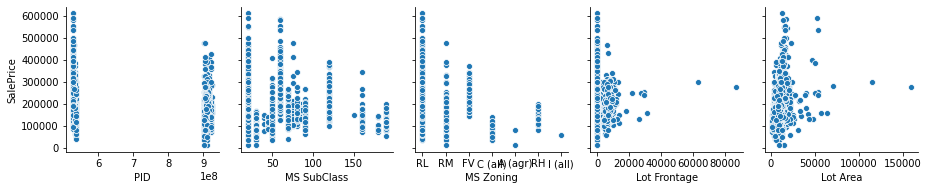

In [256]:
sns.pairplot(train_data, x_vars = ['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area'],
            y_vars = ['SalePrice']);

Lot area could be a good predictor with some transformation

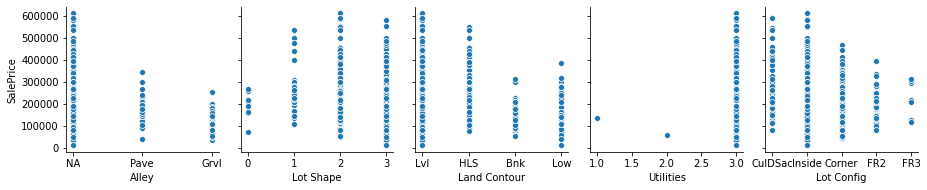

In [257]:
sns.pairplot(train_data, x_vars = ['Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config'],
            y_vars = ['SalePrice']);

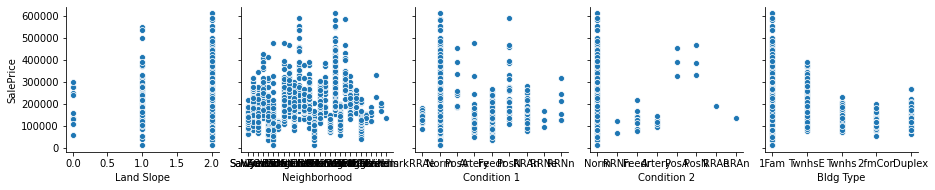

In [258]:
sns.pairplot(train_data, x_vars = ['Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type'],
            y_vars = ['SalePrice']);

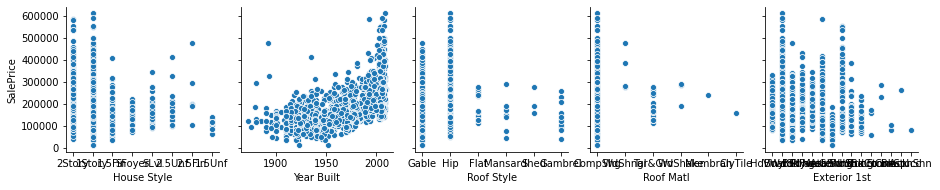

In [259]:
sns.pairplot(train_data, x_vars = 
['House Style', 'Year Built', 'Roof Style',
       'Roof Matl', 'Exterior 1st'],
            y_vars = ['SalePrice']);


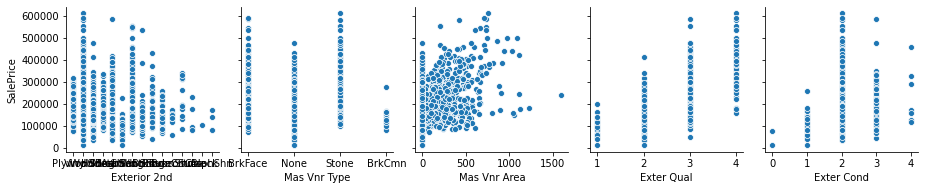

In [260]:
sns.pairplot(train_data, x_vars = 
['Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond'],
                   y_vars = ['SalePrice']);

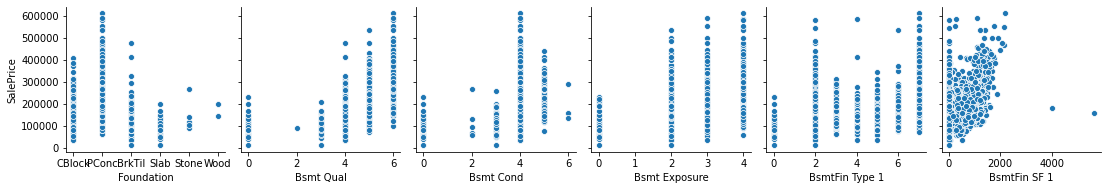

In [261]:
sns.pairplot(train_data, x_vars = 
['Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1'],
                   y_vars = ['SalePrice']);

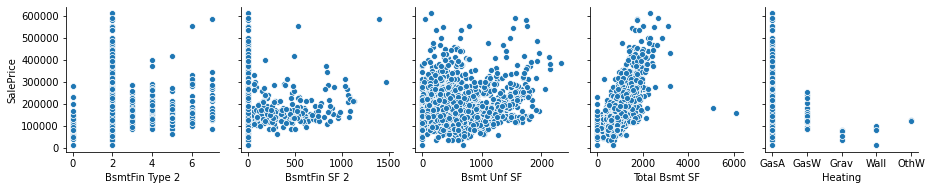

In [262]:
sns.pairplot(train_data, x_vars = 
['BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating'],
                   y_vars = ['SalePrice']);

In [263]:
possible_predictors.append('Total Bsmt SF')

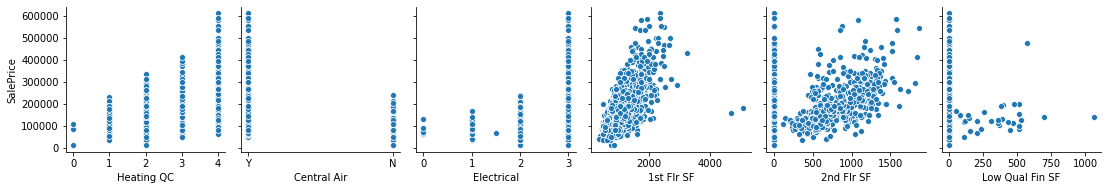

In [264]:
sns.pairplot(train_data, x_vars = 
['Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF'],
                   y_vars = ['SalePrice']);

In [265]:
possible_predictors.append('1st Flr SF')

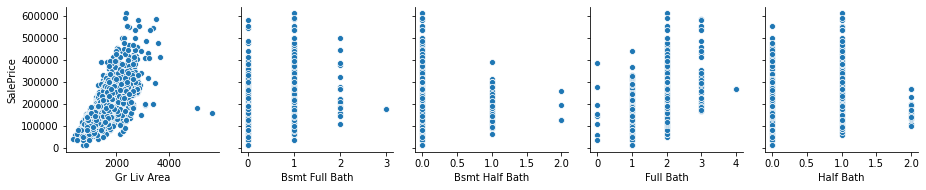

In [266]:
sns.pairplot(train_data, x_vars = 
['Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath'],
                   y_vars = ['SalePrice']);

In [267]:
possible_predictors.append('Gr Liv Area')

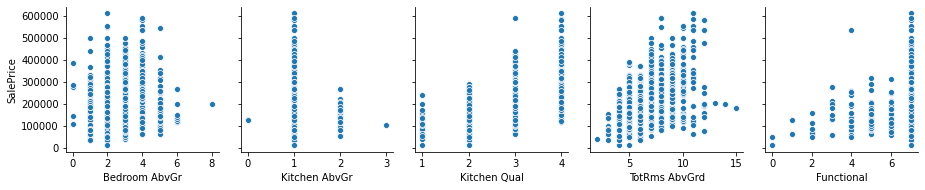

In [268]:
sns.pairplot(train_data, x_vars = 
['Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional'],
                   y_vars = ['SalePrice']);

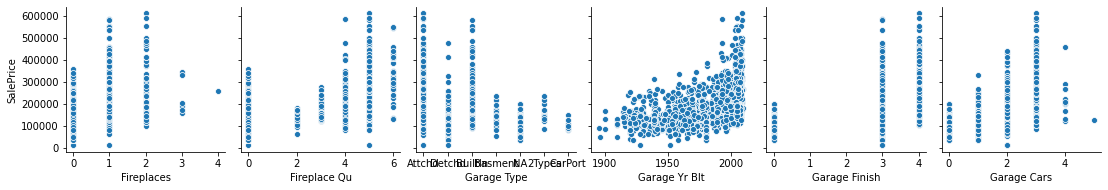

In [269]:
sns.pairplot(train_data, x_vars = 
['Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars'],
                   y_vars = ['SalePrice']);

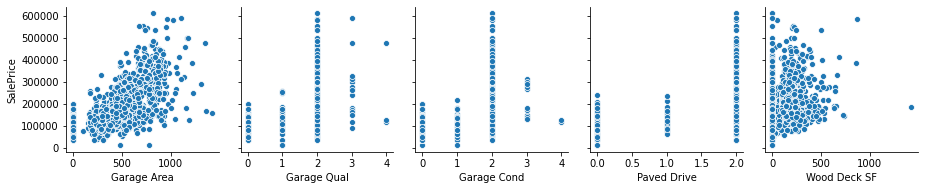

In [270]:
sns.pairplot(train_data, x_vars = 
['Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF'],
                   y_vars = ['SalePrice']);

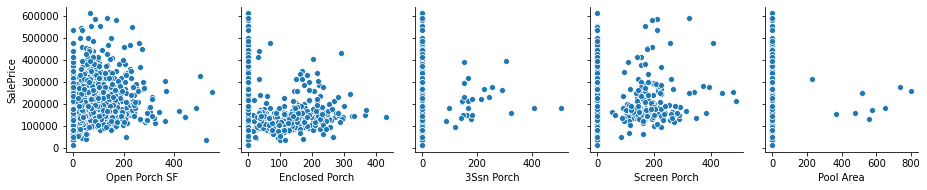

In [271]:
sns.pairplot(train_data, x_vars = 
['Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area'],
                   y_vars = ['SalePrice']);

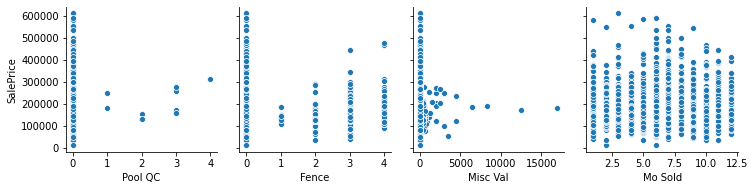

In [272]:
sns.pairplot(train_data, x_vars = 
['Pool QC',
       'Fence', 'Misc Val', 'Mo Sold'],
                   y_vars = ['SalePrice']);

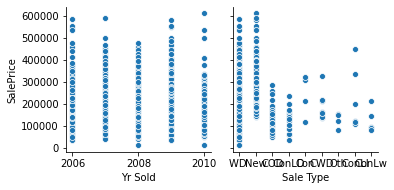

In [273]:
sns.pairplot(train_data, x_vars = 
['Yr Sold', 'Sale Type'],
                   y_vars = ['SalePrice']);

In [274]:
print(f"The plausible predictors at first round of glancing at the graphs are: {possible_predictors}.")

The plausible predictors at first round of glancing at the graphs are: ['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area'].


## More Explanatory Data Analysis

#### Dropping Outliers

In [578]:
combined['SalePrice'].median()

161000.0

In [591]:
price = combined['SalePrice'] <= 200_000
sq = combined['BsmtFin SF 1'] >= 4_000

In [592]:
combined.loc[price&sq, ['SalePrice', 'split']]

,SalePrice,split


In [590]:
combined.drop(index=[947,1861], inplace=True)

In [275]:
features_added = []

#### Year Sold

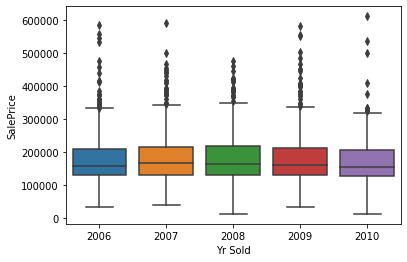

In [276]:
sns.boxplot(x='Yr Sold', y='SalePrice', data=train_data);

#### Paved Drive

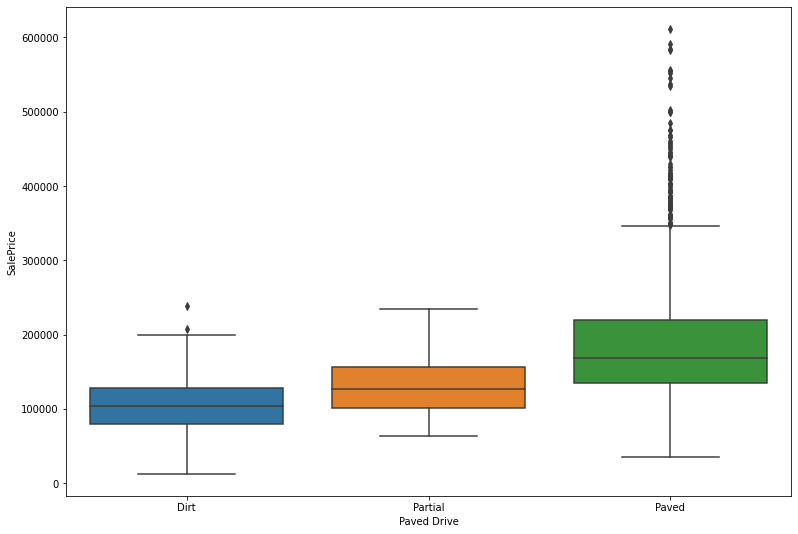

In [277]:
plt.figure(figsize=(13,9));
sns.boxplot(x='Paved Drive', y='SalePrice', data=train_data);
plt.xticks([0,1,2],['Dirt','Partial', 'Paved']);

In [278]:
combined['paved'] = combined['Paved Drive'].map(lambda x: 1 if x == 2 else 0)

In [279]:
combined['paved']

0       1
1       1
2       1
3       1
4       0
       ..
2899    1
2900    1
2901    1
2902    1
2903    1
Name: paved, Length: 2904, dtype: int64

In [280]:
features_added.append('paved')

#### Pool Area

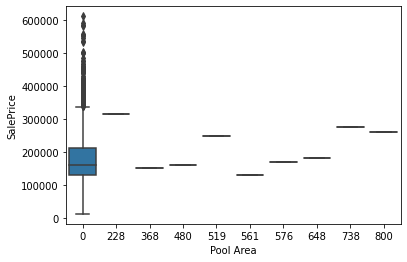

In [281]:
sns.boxplot(x='Pool Area', y='SalePrice', data=train_data);

#### Neighborhoods

In [282]:
train_data.groupby(['Neighborhood']).count().index

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR',
       'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', name='Neighborhood')

In [283]:
neighborhood_x = train_data.groupby(['Neighborhood'])['SalePrice'].median().sort_values().index

In [284]:
neighborhood_y = train_data.groupby(['Neighborhood'])['SalePrice'].median().sort_values()

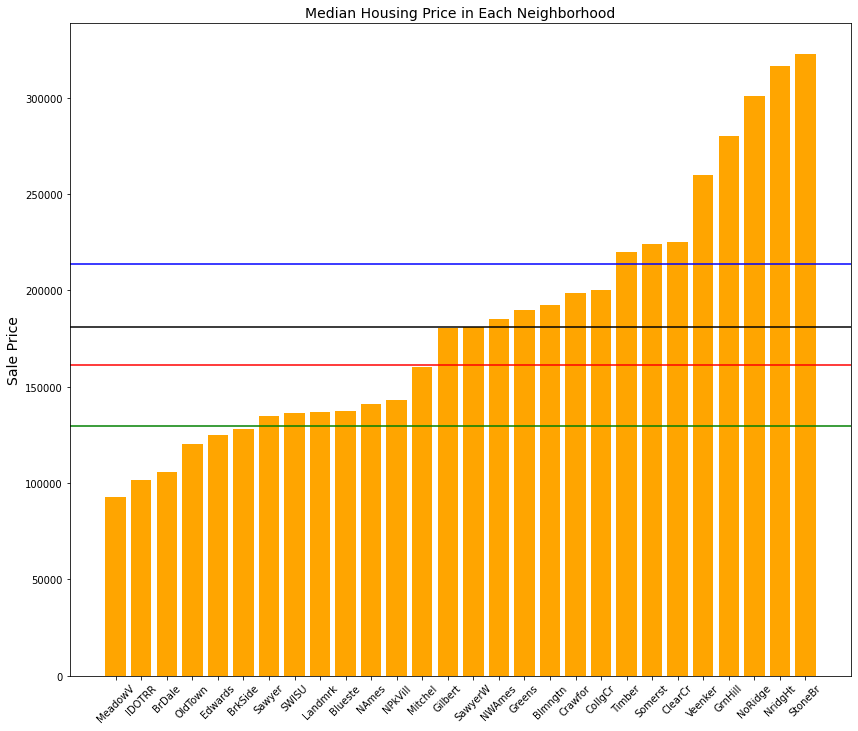

In [519]:
plt.figure(figsize=(14,12))
plt.bar(neighborhood_x, neighborhood_y, color='orange');
plt.xticks(rotation=45);
plt.title(label='Median Housing Price in Each Neighborhood', size=14);
plt.ylabel(ylabel='Sale Price', size=14);
plt.axhline(train_data['SalePrice'].median(), color='red', label='Median');
plt.axhline(np.percentile(train_data['SalePrice'],25), color='green');
plt.axhline(np.percentile(train_data['SalePrice'],75), color='blue');
plt.axhline(train_data['SalePrice'].mean(), color='black');

In [572]:
under_avg = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'SWISU', 'Landmrk', 'Blueste', 'NAmes', 'NPkVill', 'Mitchel']

In [573]:
avg = ['Gilbert', 'SawyerW', 'NWAmes', 'Greens', 'Blmngtn', 'Crawfor',
       'CollgCr', 'Timber', 'Somerst', 'ClearCr']

In [574]:
above = ['Veenker', 'GrnHill',
       'NoRidge', 'NridgHt', 'StoneBr']

In [575]:
random = combined['Neighborhood'].map({'MeadowV':1, 
                                       'IDOTRR':1, 
                                       'BrDale':1, 
                                       'OldTown':1, 
                                       'Edwards':1, 
                                       'BrkSide':1,
                                       'Sawyer':1, 
                                       'SWISU':1, 
                                       'Landmrk':1, 
                                       'Blueste':1, 
                                       'NAmes':1, 
                                       'NPkVill':1, 
                                       'Mitchel':1,
                                       'Gilbert':1.5, 
                                       'SawyerW':1.5, 
                                       'NWAmes':1.5, 
                                       'Greens':1.5, 
                                       'Blmngtn':1.5, 
                                       'Crawfor':1.5,
                                       'CollgCr':1.5, 
                                       'Timber':1.5, 
                                       'Somerst':1.5, 
                                       'ClearCr':1.5,
                                       'Veenker':2, 
                                       'GrnHill':2,
                                       'NoRidge':2, 
                                       'NridgHt':2, 
                                       'StoneBr':2
                                  
})

In [577]:
combined['Neighborhood Codes'] = random

In [593]:
features_added.append('Neighborhood Codes')

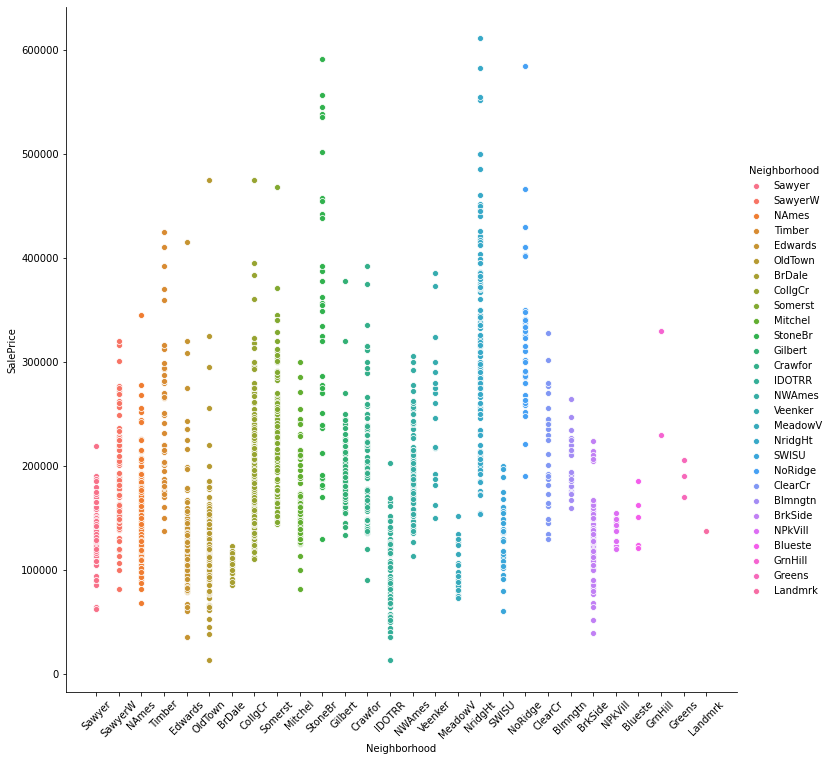

In [635]:
sns.pairplot(data=combined, x_vars='Neighborhood', y_vars='SalePrice', hue='Neighborhood', height=10);
plt.xticks(rotation=45);

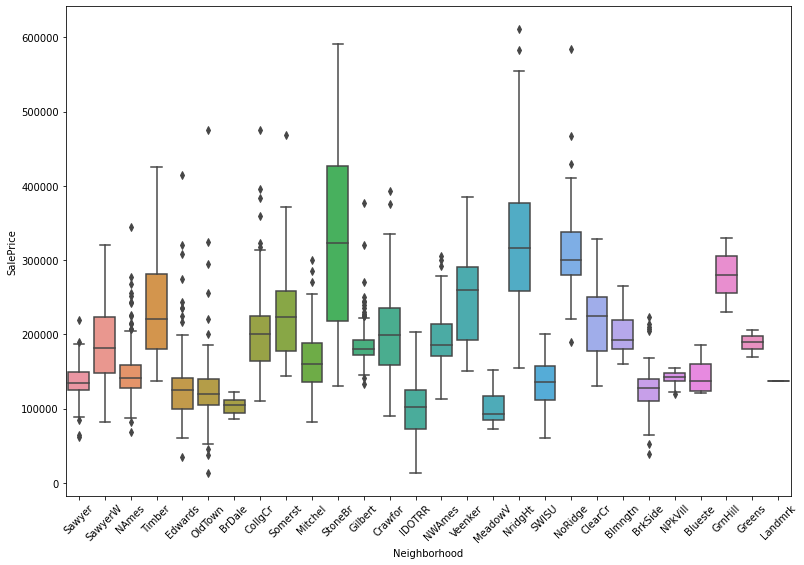

In [286]:
plt.figure(figsize=(13,9));
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data);
plt.xticks(rotation=45);

The housing price in different neighborhoods is definitely quite worth it for feature engineering where categorizing them into one or the other bucket might help the prediction.

#### Sale Type

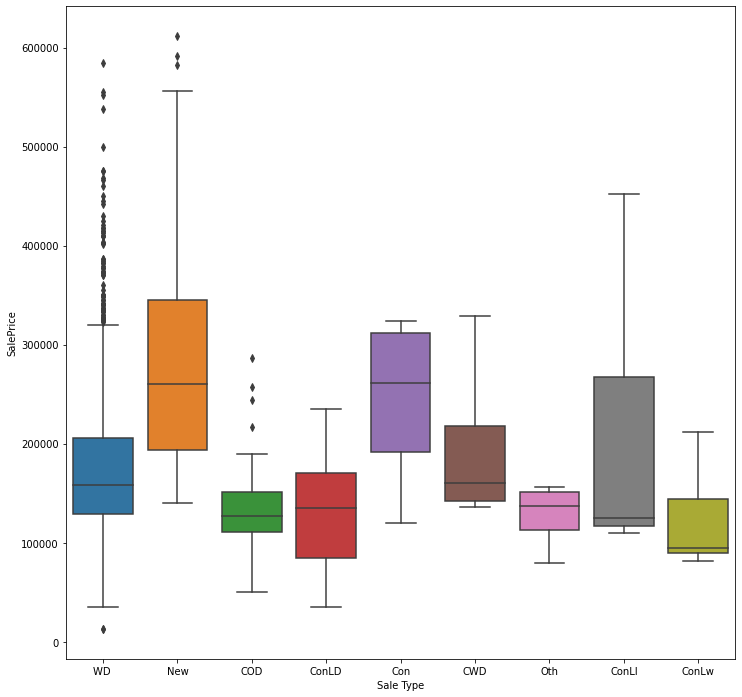

In [287]:
plt.figure(figsize=(12,12));
sns.boxplot(x='Sale Type', y='SalePrice', data=train_data);

This is clear here that new house are generally more expensive than others and the next one is condo. This could be an opportunity to create a feature where 1 equals Con or new and 0 for others.  

In [288]:
train_data.groupby(['Sale Type']).median()['SalePrice']

Sale Type
COD      127500.0
CWD      160750.0
Con      261615.0
ConLD    135000.0
ConLI    125000.0
ConLw     95000.0
New      260116.0
Oth      137050.0
WD       158000.0
Name: SalePrice, dtype: float64

In [289]:
train_data.groupby(['Sale Type']).count()['SalePrice']

Sale Type
COD        63
CWD        10
Con         4
ConLD      16
ConLI       7
ConLw       5
New       149
Oth         4
WD       1768
Name: SalePrice, dtype: int64

In [290]:
combined['new or con']= combined['Sale Type'].map(lambda x: 1 if ((x == 'New') or (x == 'Con')) else 0)

In [291]:
combined.loc[(combined['Sale Type'] == 'Con'), 'new or con']

19      1
68      1
130     1
300     1
2042    1
Name: new or con, dtype: int64

In [338]:
features_added.append('new or con')

#### Central Air

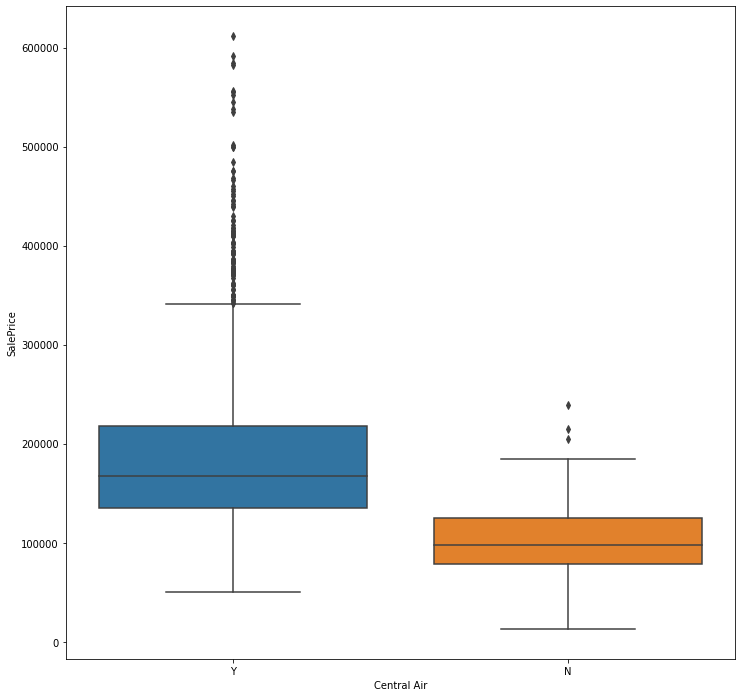

In [343]:
plt.figure(figsize=(12,12));
sns.boxplot(x = 'Central Air', y='SalePrice', data=combined);

Based on the boxplot, it is quite evident that houses with Central Air generally sells at a higher sales price than the houses without. So central air will be added to the predictors. 

In [345]:
combined['Central Air']=combined['Central Air'].map(lambda x: 1 if x == 'Y' else 0)

In [346]:
combined['Central Air'].isnull().sum()

0

In [347]:
combined['Central Air'].head()

0    1
1    1
2    1
3    1
4    1
Name: Central Air, dtype: int64

In [348]:
features_added.append('Central Air')

Log Transformation on Lot Area

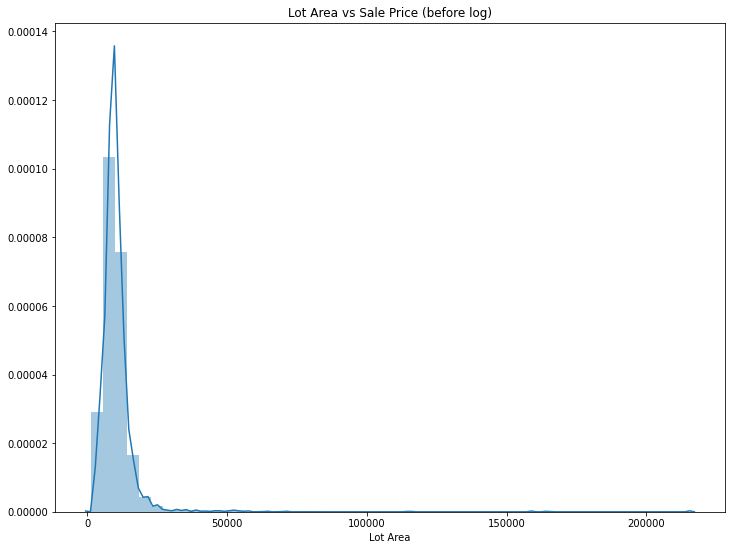

In [361]:
plt.figure(figsize=(12,9));
sns.distplot(combined['Lot Area'],kde=True, bins=50);
plt.title(label='Lot Area vs Sale Price (before log)');

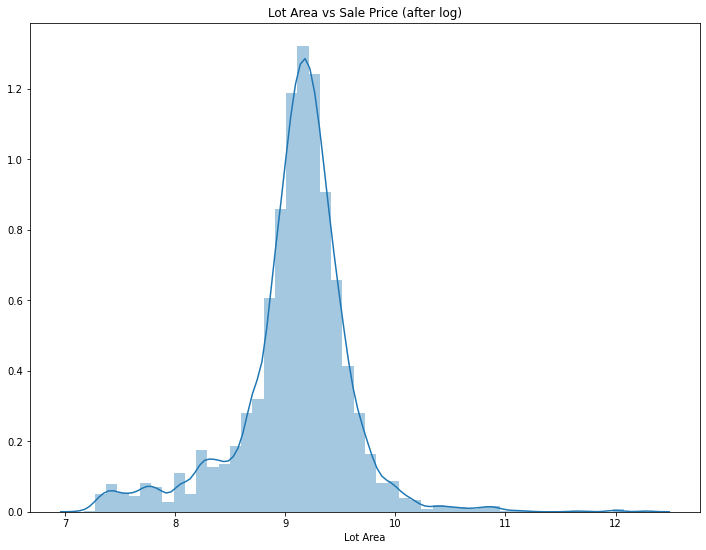

In [362]:
plt.figure(figsize=(12,9));
sns.distplot(np.log(combined['Lot Area']),kde=True, bins=50);
plt.title(label='Lot Area vs Sale Price (after log)');

From the histograms, after the log transformation, the distribution is much more normalized. 

In [665]:
lot_area_log = np.log(combined['Lot Area'])

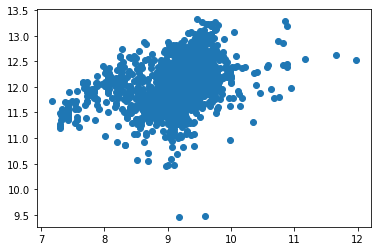

In [667]:
plt.scatter(lot_area_log, np.log(combined['SalePrice']));

This is slightly better than the scatter plot before log transformation. Might be a good indicator. I'm still hestitant to use this because of the variance and lack of linear relationship.

#### Electrical

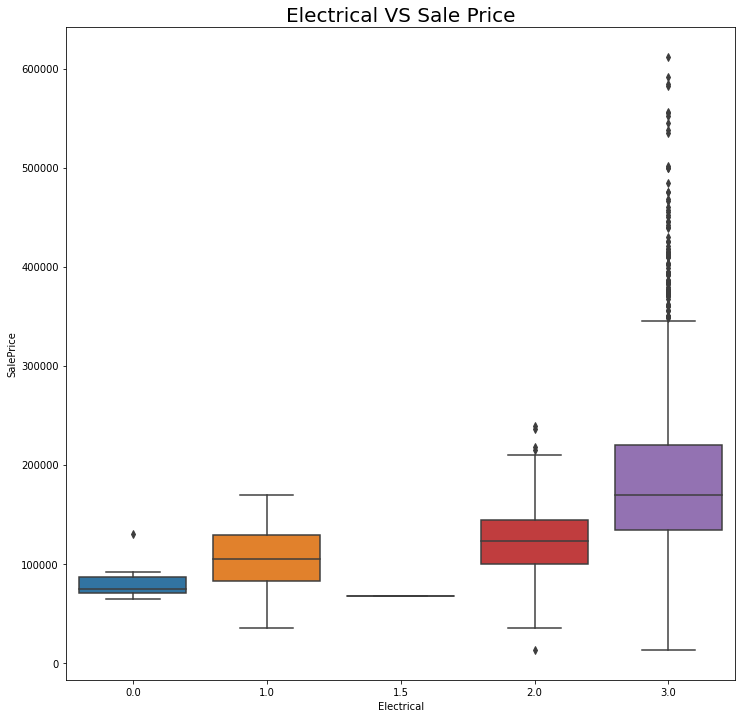

In [686]:
plt.figure(figsize=(12,12));
sns.boxplot(data=combined, x='Electrical', y='SalePrice');
plt.title(label='Electrical VS Sale Price', size=20);

The better the electrical work, the sale price seems be to generally higher. Electrical will be added to the features.

In [377]:
features_added.append('Electrical')

#### Kitchen Qual

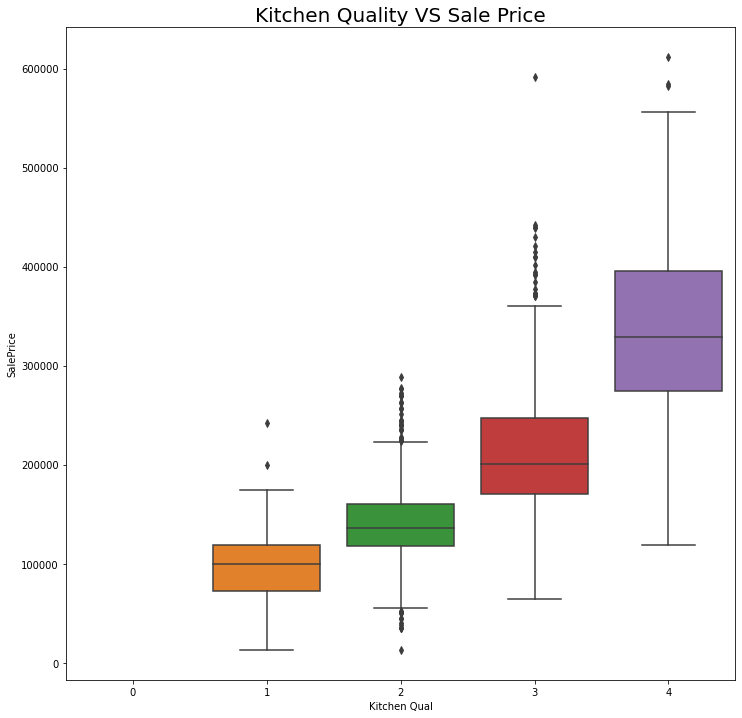

In [636]:
plt.figure(figsize=(12,12));
sns.boxplot(data=combined, x='Kitchen Qual', y='SalePrice');
plt.title(label='Kitchen Quality VS Sale Price', size=20);

In [379]:
features_added.append('Kitchen Qual')

In [380]:
features_added

['paved', 'new or con', 'Central Air', 'Electrical', 'Kitchen Qual']